In [2]:
import os
import time
import numpy as np
import pandas as pd
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pickle as pkl
import matplotlib.pyplot as plt

import src
from src.reload import deep_reload

In [4]:
trips=pd.read_csv('Data/NHTS_2017/trippub.csv')
# trips=trips[(trips['TRPHHVEH']==1)&(trips['TRPTRANS']>=0)&(trips['TRPTRANS']<=5)]
trips=trips[(
    (trips['TRPHHVEH']==1)&
    (trips['TRPTRANS']>=3)&
    (trips['TRPTRANS']<=6)&
    (trips['VEHID']<=2)
    )]

In [5]:
deep_reload(src)

if not os.path.isfile('Data/Generated_Data/vehicles.pkl'):
    
    vehicles=pd.read_csv('Data/NHTS_2017/vehpub.csv')
    
    phevs=vehicles[vehicles['HFUEL']==2]
    bevs=vehicles[vehicles['HFUEL']==3]
    hevs=vehicles[vehicles['HFUEL']==4]
    
    nhts_vehicles=src.calculations.Make_NHTS_Vehicles(vehicles,trips,n_households=10000)
    nhts_phevs=src.calculations.Make_NHTS_Vehicles(phevs,trips)
    nhts_bevs=src.calculations.Make_NHTS_Vehicles(bevs,trips)
    nhts_hevs=src.calculations.Make_NHTS_Vehicles(hevs,trips)
    
    pkl.dump([nhts_vehicles,nhts_phevs,nhts_bevs,nhts_hevs],
             open('Data/Generated_Data/vehicles.pkl','wb'))
    
else:
    
    nhts_vehicles,nhts_phevs,nhts_bevs,nhts_hevs=pkl.load(
        open('Data/Generated_Data/vehicles.pkl','rb'))

 Progress [------------------->] (19841/19840) 100%, 243.71 it/s, 81.41 seconds elapsed, -0.00 seconds remaining         

 Progress [------------------->] (483/482) 100%, 272.16 it/s, 1.77 seconds elapsed, -0.00 seconds remaining         

 Progress [------------------->] (608/607) 100%, 261.37 it/s, 2.33 seconds elapsed, -0.00 seconds remaining         

 Progress [------------------->] (4997/4996) 100%, 257.17 it/s, 19.43 seconds elapsed, -0.00 seconds remaining         



In [6]:
deep_reload(src)

veh_range=np.linspace(0,300,100)

utility_factor=src.calculations.CalculateUtilityFactor(
    nhts_vehicles,veh_range)
utility_factor_phevs=src.calculations.CalculateUtilityFactor(
    nhts_phevs,veh_range)
utility_factor_bevs=src.calculations.CalculateUtilityFactor(
    nhts_bevs,veh_range)
utility_factor_hevs=src.calculations.CalculateUtilityFactor(
    nhts_hevs,veh_range)

utility_factor_hc=src.calculations.CalculateUtilityFactor_HomeTripsCharge(
    nhts_vehicles,veh_range)
utility_factor_hc_phevs=src.calculations.CalculateUtilityFactor_HomeTripsCharge(
    nhts_phevs,veh_range)
utility_factor_hc_bevs=src.calculations.CalculateUtilityFactor_HomeTripsCharge(
    nhts_bevs,veh_range)
utility_factor_hc_hevs=src.calculations.CalculateUtilityFactor_HomeTripsCharge(
    nhts_hevs,veh_range)

utility_factor_hwc=src.calculations.CalculateUtilityFactor_HomeWorkTripsCharge(
    nhts_vehicles,veh_range)
utility_factor_hwc_phevs=src.calculations.CalculateUtilityFactor_HomeWorkTripsCharge(
    nhts_phevs,veh_range)
utility_factor_hwc_bevs=src.calculations.CalculateUtilityFactor_HomeWorkTripsCharge(
    nhts_bevs,veh_range)
utility_factor_hwc_hevs=src.calculations.CalculateUtilityFactor_HomeWorkTripsCharge(
    nhts_hevs,veh_range)

utility_factor_ac=src.calculations.CalculateUtilityFactor_AllTripsCharge(
    nhts_vehicles,veh_range)
utility_factor_ac_phevs=src.calculations.CalculateUtilityFactor_AllTripsCharge(
    nhts_phevs,veh_range)
utility_factor_ac_bevs=src.calculations.CalculateUtilityFactor_AllTripsCharge(
    nhts_bevs,veh_range)
utility_factor_ac_hevs=src.calculations.CalculateUtilityFactor_AllTripsCharge(
    nhts_hevs,veh_range)

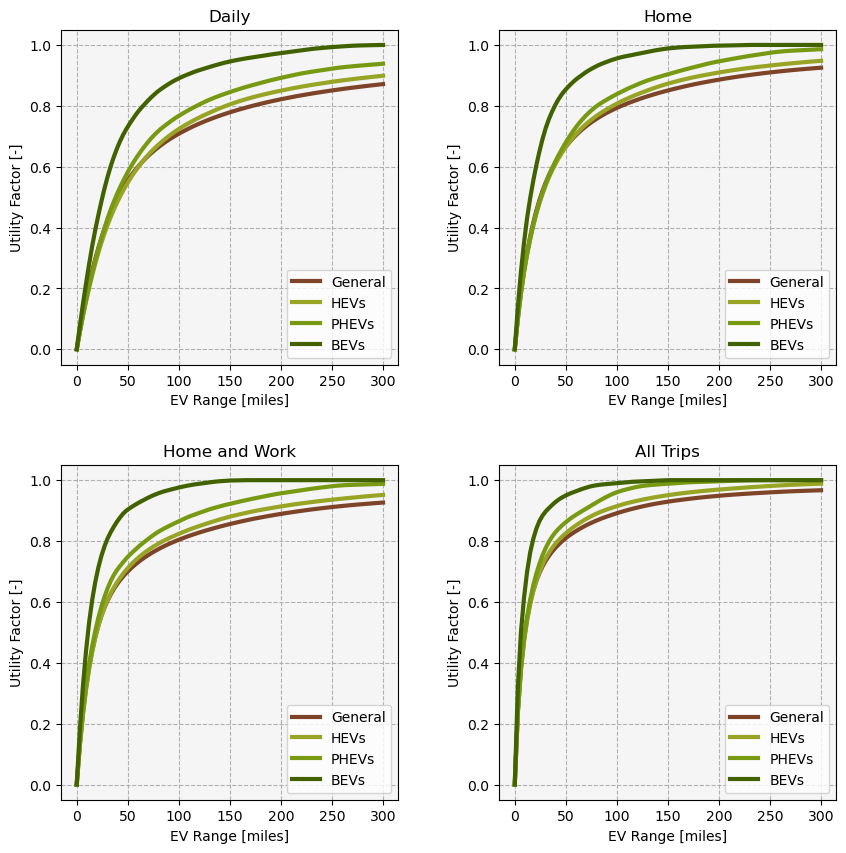

In [7]:
deep_reload(src)

fig,ax=plt.subplots(2,2,figsize=(10,10),gridspec_kw={'hspace':.3,'wspace':.3})

color_scheme=src.figures.colors['forest']

labels=['General','HEVs','PHEVs','BEVs']

y=[utility_factor,utility_factor_hevs,utility_factor_phevs,utility_factor_bevs]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[0,0],
                       line_kwargs={'lw':3},
                       axes_kwargs={'facecolor':'whitesmoke',
                                    'title':'Daily',
                                    'xlabel':'EV Range [miles]',
                                    'ylabel':'Utility Factor [-]'
                                    })

y=[utility_factor_hc,utility_factor_hc_hevs,utility_factor_hc_phevs,utility_factor_hc_bevs]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[0,1],
                       line_kwargs={'lw':3},
                       axes_kwargs={'facecolor':'whitesmoke',
                                    'title':'Home',
                                    'xlabel':'EV Range [miles]',
                                    'ylabel':'Utility Factor [-]'
                                   })

y=[utility_factor_hwc,utility_factor_hwc_hevs,utility_factor_hwc_phevs,
   utility_factor_hwc_bevs]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[1,0],
                       line_kwargs={'lw':3},
                       axes_kwargs={'facecolor':'whitesmoke',
                                    'title':'Home and Work',
                                    'xlabel':'EV Range [miles]',
                                    'ylabel':'Utility Factor [-]'
                                   })

y=[utility_factor_ac,utility_factor_ac_hevs,utility_factor_ac_phevs,utility_factor_ac_bevs]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[1,1],
                       line_kwargs={'lw':3},
                       axes_kwargs={'facecolor':'whitesmoke',
                                    'title':'All Trips',
                                    'xlabel':'EV Range [miles]',
                                    'ylabel':'Utility Factor [-]'
                                   })

fig.savefig('Document/figs/UF_Charging_Powertrains.png',bbox_inches='tight',dpi=300)

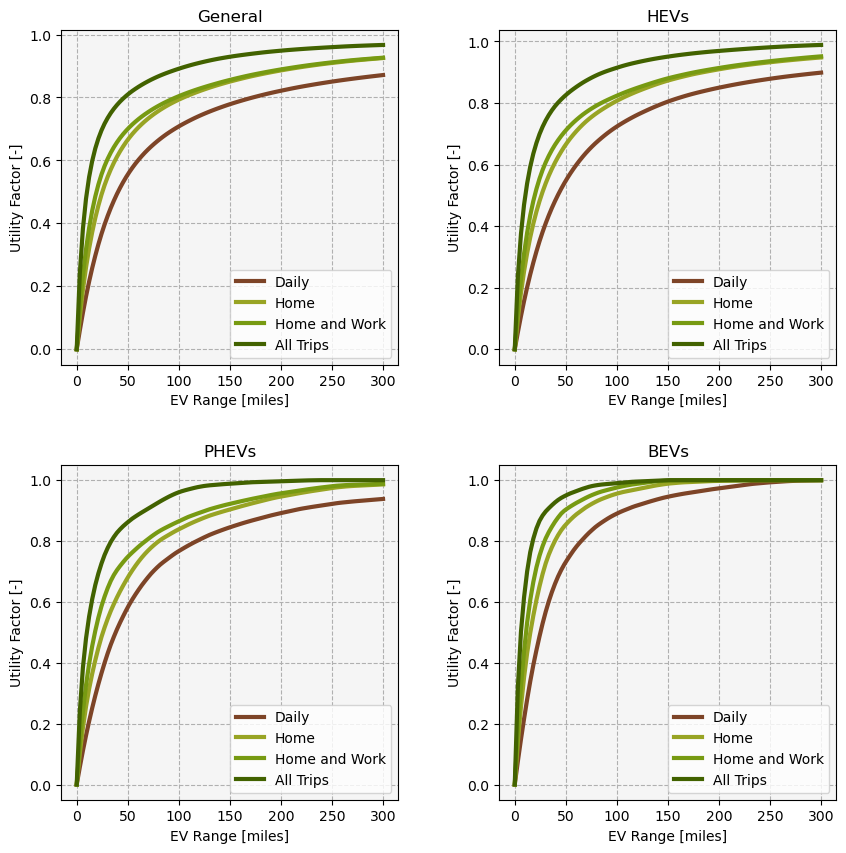

In [8]:
deep_reload(src)

fig,ax=plt.subplots(2,2,figsize=(10,10),gridspec_kw={'hspace':.3,'wspace':.3})

color_scheme=src.figures.colors['forest']

labels=['Daily','Home','Home and Work','All Trips']

y=[utility_factor,utility_factor_hc,utility_factor_hwc,utility_factor_ac]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[0,0],
                       line_kwargs={'lw':3},
                       axes_kwargs={'facecolor':'whitesmoke',
                                    'title':'General',
                                    'xlabel':'EV Range [miles]',
                                    'ylabel':'Utility Factor [-]'
                                   })

y=[utility_factor_hevs,utility_factor_hc_hevs,utility_factor_hwc_hevs,
   utility_factor_ac_hevs]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[0,1],
                       line_kwargs={'lw':3},
                       axes_kwargs={'facecolor':'whitesmoke',
                                    'title':'HEVs',
                                    'xlabel':'EV Range [miles]',
                                    'ylabel':'Utility Factor [-]'
                                   })

y=[utility_factor_phevs,utility_factor_hc_phevs,utility_factor_hwc_phevs,
   utility_factor_ac_phevs]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[1,0],
                       line_kwargs={'lw':3},
                       axes_kwargs={'facecolor':'whitesmoke',
                                    'title':'PHEVs',
                                    'xlabel':'EV Range [miles]',
                                    'ylabel':'Utility Factor [-]'
                                   })

y=[utility_factor_bevs,utility_factor_hc_bevs,utility_factor_hwc_bevs,
   utility_factor_ac_bevs]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[1,1],
                       line_kwargs={'lw':3},
                       axes_kwargs={'facecolor':'whitesmoke',
                                    'title':'BEVs',
                                    'xlabel':'EV Range [miles]',
                                    'ylabel':'Utility Factor [-]'
                                   })

fig.savefig('Document/figs/UF_Powertrains_Charging.png',bbox_inches='tight',dpi=300)

In [7]:
deep_reload(src)

veh_range=np.linspace(0,300,100)

gas_price=3.00
elec_price=14.61*.11

energy_price=src.calculations.CalculateEnergyCosts(nhts_vehicles,veh_range,gas_price=gas_price,elec_price=elec_price,
               uf_function=src.calculations.CalculateUtilityFactor)
energy_price_hc=src.calculations.CalculateEnergyCosts(nhts_vehicles,veh_range,gas_price=gas_price,elec_price=elec_price,
               uf_function=src.calculations.CalculateUtilityFactor_HomeTripsCharge)
energy_price_hwc=src.calculations.CalculateEnergyCosts(nhts_vehicles,veh_range,gas_price=gas_price,elec_price=elec_price,
               uf_function=src.calculations.CalculateUtilityFactor_HomeWorkTripsCharge)
energy_price_ac=src.calculations.CalculateEnergyCosts(nhts_vehicles,veh_range,gas_price=gas_price,elec_price=elec_price,
               uf_function=src.calculations.CalculateUtilityFactor_AllTripsCharge)

energy_price_hevs=src.calculations.CalculateEnergyCosts(nhts_hevs,veh_range,gas_price=gas_price,elec_price=elec_price,
               uf_function=src.calculations.CalculateUtilityFactor)
energy_price_hc_hevs=src.calculations.CalculateEnergyCosts(nhts_hevs,veh_range,gas_price=gas_price,elec_price=elec_price,
               uf_function=src.calculations.CalculateUtilityFactor_HomeTripsCharge)
energy_price_hwc_hevs=src.calculations.CalculateEnergyCosts(nhts_hevs,veh_range,gas_price=gas_price,elec_price=elec_price,
               uf_function=src.calculations.CalculateUtilityFactor_HomeWorkTripsCharge)
energy_price_ac_hevs=src.calculations.CalculateEnergyCosts(nhts_hevs,veh_range,gas_price=gas_price,elec_price=elec_price,
               uf_function=src.calculations.CalculateUtilityFactor_AllTripsCharge)

energy_price_phevs=src.calculations.CalculateEnergyCosts(nhts_phevs,veh_range,gas_price=gas_price,elec_price=elec_price,
               uf_function=src.calculations.CalculateUtilityFactor)
energy_price_hc_phevs=src.calculations.CalculateEnergyCosts(nhts_phevs,veh_range,gas_price=gas_price,elec_price=elec_price,
               uf_function=src.calculations.CalculateUtilityFactor_HomeTripsCharge)
energy_price_hwc_phevs=src.calculations.CalculateEnergyCosts(nhts_phevs,veh_range,gas_price=gas_price,elec_price=elec_price,
               uf_function=src.calculations.CalculateUtilityFactor_HomeWorkTripsCharge)
energy_price_ac_phevs=src.calculations.CalculateEnergyCosts(nhts_phevs,veh_range,gas_price=gas_price,elec_price=elec_price,
               uf_function=src.calculations.CalculateUtilityFactor_AllTripsCharge)

energy_price_bevs=src.calculations.CalculateEnergyCosts(nhts_bevs,veh_range,gas_price=gas_price,elec_price=elec_price,
               uf_function=src.calculations.CalculateUtilityFactor)
energy_price_hc_bevs=src.calculations.CalculateEnergyCosts(nhts_bevs,veh_range,gas_price=gas_price,elec_price=elec_price,
               uf_function=src.calculations.CalculateUtilityFactor_HomeTripsCharge)
energy_price_hwc_bevs=src.calculations.CalculateEnergyCosts(nhts_bevs,veh_range,gas_price=gas_price,elec_price=elec_price,
               uf_function=src.calculations.CalculateUtilityFactor_HomeWorkTripsCharge)
energy_price_ac_bevs=src.calculations.CalculateEnergyCosts(nhts_bevs,veh_range,gas_price=gas_price,elec_price=elec_price,
               uf_function=src.calculations.CalculateUtilityFactor_AllTripsCharge)

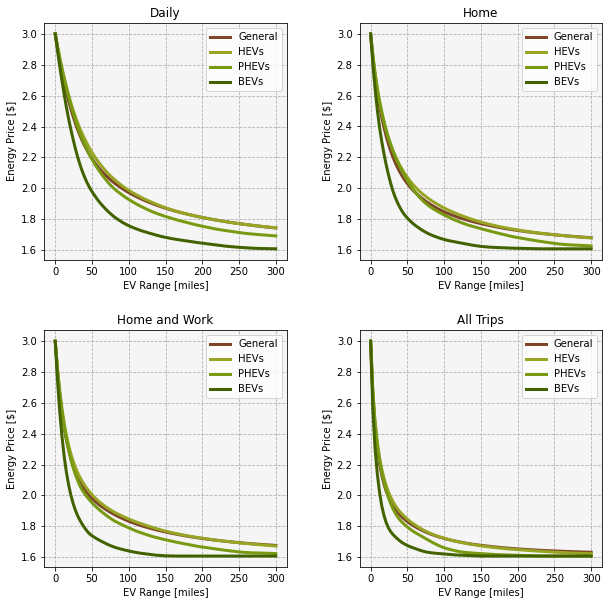

In [8]:
deep_reload(src)

fig,ax=plt.subplots(2,2,figsize=(10,10),gridspec_kw={'hspace':.3,'wspace':.3})

color_scheme=src.figures.colors['forest']

labels=['General','HEVs','PHEVs','BEVs']

y=[energy_price,energy_price_hevs,energy_price_phevs,energy_price_bevs]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[0,0],
                       line_kwargs={'lw':3},axes_kwargs={'facecolor':'whitesmoke','title':'Daily',
                                                         'xlabel':'EV Range [miles]','ylabel':'Energy Price [$]'})

y=[energy_price_hc,energy_price_hc_hevs,energy_price_hc_phevs,energy_price_hc_bevs]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[0,1],
                       line_kwargs={'lw':3},axes_kwargs={'facecolor':'whitesmoke','title':'Home',
                                                         'xlabel':'EV Range [miles]','ylabel':'Energy Price [$]'})

y=[energy_price_hwc,energy_price_hwc_hevs,energy_price_hwc_phevs,energy_price_hwc_bevs]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[1,0],
                       line_kwargs={'lw':3},axes_kwargs={'facecolor':'whitesmoke','title':'Home and Work',
                                                         'xlabel':'EV Range [miles]','ylabel':'Energy Price [$]'})

y=[energy_price_ac,energy_price_ac_hevs,energy_price_ac_phevs,energy_price_ac_bevs]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[1,1],
                       line_kwargs={'lw':3},axes_kwargs={'facecolor':'whitesmoke','title':'All Trips',
                                                         'xlabel':'EV Range [miles]','ylabel':'Energy Price [$]'})

fig.savefig('Document/figs/EP_Charging_Powertrains.png',bbox_inches='tight',dpi=300)

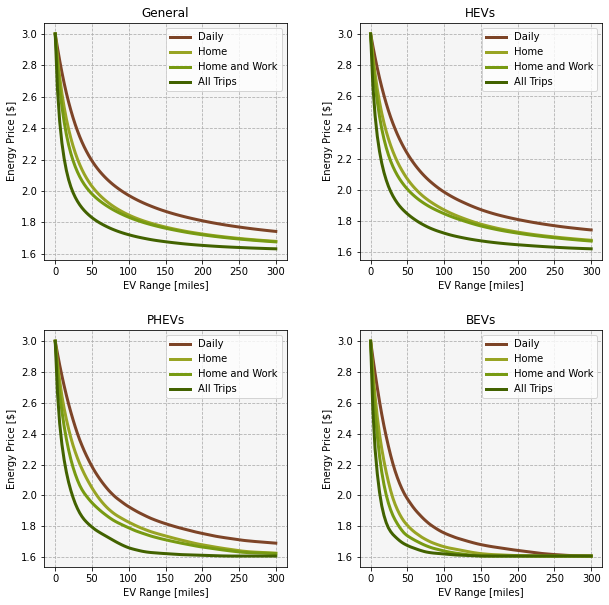

In [9]:
deep_reload(src)

fig,ax=plt.subplots(2,2,figsize=(10,10),gridspec_kw={'hspace':.3,'wspace':.3})

color_scheme=src.figures.colors['forest']

labels=['Daily','Home','Home and Work','All Trips']

y=[energy_price,energy_price_hc,energy_price_hwc,energy_price_ac]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[0,0],
                       line_kwargs={'lw':3},axes_kwargs={'facecolor':'whitesmoke','title':'General',
                                                         'xlabel':'EV Range [miles]','ylabel':'Energy Price [$]'})

y=[energy_price_hevs,energy_price_hc_hevs,energy_price_hwc_hevs,energy_price_ac_hevs]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[0,1],
                       line_kwargs={'lw':3},axes_kwargs={'facecolor':'whitesmoke','title':'HEVs',
                                                         'xlabel':'EV Range [miles]','ylabel':'Energy Price [$]'})

y=[energy_price_phevs,energy_price_hc_phevs,energy_price_hwc_phevs,energy_price_ac_phevs]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[1,0],
                       line_kwargs={'lw':3},axes_kwargs={'facecolor':'whitesmoke','title':'PHEVs',
                                                         'xlabel':'EV Range [miles]','ylabel':'Energy Price [$]'})

y=[energy_price_bevs,energy_price_hc_bevs,energy_price_hwc_bevs,energy_price_ac_bevs]
src.figures.SeriesPlot(veh_range,y,labels=labels,colors=color_scheme,ax=ax[1,1],
                       line_kwargs={'lw':3},axes_kwargs={'facecolor':'whitesmoke','title':'BEVs',
                                                         'xlabel':'EV Range [miles]','ylabel':'Energy Price [$]'})

fig.savefig('Document/figs/EP_Powertrains_Charging.png',bbox_inches='tight',dpi=300)

In [46]:
df_veh_info=pd.read_excel('vehicles-2023-06-22.xlsx')
df_veh_info=df_veh_info[~np.isnan(df_veh_info['AER Low'])]
df_veh_info.reset_index(inplace=True,drop=True)

aer_low=df_veh_info['AER Low'].to_numpy()
aer_high=df_veh_info['AER High'].to_numpy()

aer=np.zeros(df_veh_info.shape[0])

for idx in range(aer.shape[0]):
    if ~np.isnan(aer_high[idx]):
        aer[idx]=np.mean([aer_low[idx],aer_high[idx]])
    else:
        aer[idx]=aer_low[idx]

df_veh_info['AER']=aer

info_phev_sedan_nlux=df_veh_info[(df_veh_info['Category']=='Sedan/Wagon')&(df_veh_info['Premium']=='No')&(df_veh_info['Fuel']=='Plug-in Hybrid Electric')]
info_phev_sedan_lux=df_veh_info[(df_veh_info['Category']=='Sedan/Wagon')&(df_veh_info['Premium']=='Yes')&(df_veh_info['Fuel']=='Plug-in Hybrid Electric')]
info_phev_suv_nlux=df_veh_info[(df_veh_info['Category']=='SUV')&(df_veh_info['Premium']=='No')&(df_veh_info['Fuel']=='Plug-in Hybrid Electric')]
info_phev_suv_lux=df_veh_info[(df_veh_info['Category']=='SUV')&(df_veh_info['Premium']=='Yes')&(df_veh_info['Fuel']=='Plug-in Hybrid Electric')]
info_phev_pickup=df_veh_info[(df_veh_info['Category']=='Pickup')&(df_veh_info['Fuel']=='Plug-in Hybrid Electric')]

info_bev_sedan_nlux=df_veh_info[(df_veh_info['Category']=='Sedan/Wagon')&(df_veh_info['Premium']=='No')&(df_veh_info['Fuel']=='Electric')]
info_bev_sedan_lux=df_veh_info[(df_veh_info['Category']=='Sedan/Wagon')&(df_veh_info['Premium']=='Yes')&(df_veh_info['Fuel']=='Electric')]
info_bev_suv_nlux=df_veh_info[(df_veh_info['Category']=='SUV')&(df_veh_info['Premium']=='No')&(df_veh_info['Fuel']=='Electric')]
info_bev_suv_lux=df_veh_info[(df_veh_info['Category']=='SUV')&(df_veh_info['Premium']=='Yes')&(df_veh_info['Fuel']=='Electric')]
info_bev_pickup=df_veh_info[(df_veh_info['Category']=='Pickup')&(df_veh_info['Fuel']=='Electric')]

info_hev_sedan_nlux=df_veh_info[(df_veh_info['Category']=='Sedan/Wagon')&(df_veh_info['Premium']=='No')&(df_veh_info['Fuel']=='Hybrid Electric')]
info_hev_sedan_lux=df_veh_info[(df_veh_info['Category']=='Sedan/Wagon')&(df_veh_info['Premium']=='Yes')&(df_veh_info['Fuel']=='Hybrid Electric')]
info_hev_suv_nlux=df_veh_info[(df_veh_info['Category']=='SUV')&(df_veh_info['Premium']=='No')&(df_veh_info['Fuel']=='Hybrid Electric')]
info_hev_suv_lux=df_veh_info[(df_veh_info['Category']=='SUV')&(df_veh_info['Premium']=='Yes')&(df_veh_info['Fuel']=='Hybrid Electric')]
info_hev_pickup=df_veh_info[(df_veh_info['Category']=='Pickup')&(df_veh_info['Fuel']=='Hybrid Electric')]

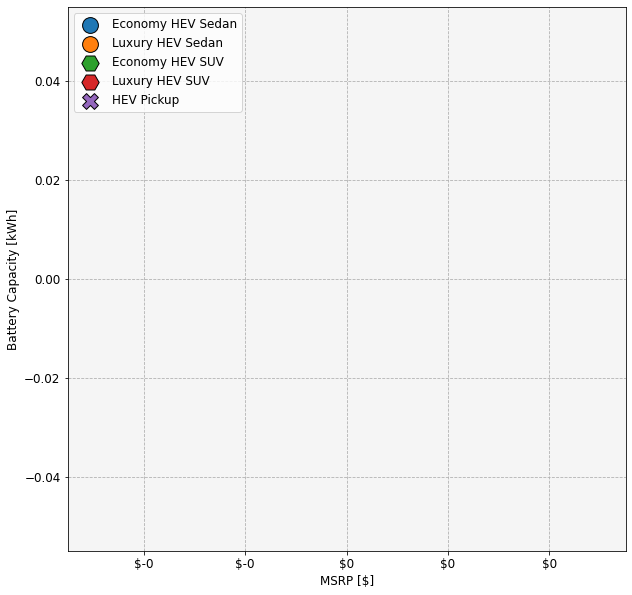

In [47]:
deep_reload(src)

s=250
ec='k'
fontsize=12

plt.rc('font', size=fontsize)

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(info_hev_sedan_nlux['MSRP'],info_hev_sedan_nlux['Battery Capacity (kWh)'],s=s,marker='o',ec=ec,label='Economy HEV Sedan')
ax.scatter(info_hev_sedan_lux['MSRP'],info_hev_sedan_lux['Battery Capacity (kWh)'],s=s,marker='o',ec=ec,label='Luxury HEV Sedan')
ax.scatter(info_hev_suv_nlux['MSRP'],info_hev_suv_nlux['Battery Capacity (kWh)'],s=s*1.2,marker='H',ec=ec,label='Economy HEV SUV')
ax.scatter(info_hev_suv_lux['MSRP'],info_hev_suv_lux['Battery Capacity (kWh)'],s=s*1.2,marker='H',ec=ec,label='Luxury HEV SUV')
ax.scatter(info_hev_pickup['MSRP'],info_hev_pickup['Battery Capacity (kWh)'],s=s,marker='X',ec=ec,label='HEV Pickup')

formatter=mtick.StrMethodFormatter('${x:,.0f}')
ax.set_xlabel('MSRP [$]')
ax.xaxis.set_major_formatter(formatter) 
ax.set_ylabel('Battery Capacity [kWh]')

ax.grid(ls='--')
ax.legend(loc=2)
ax.set_facecolor('whitesmoke')

# fig.savefig('Document/figs/PriceCapacity_BEVs.png',bbox_inches='tight',dpi=300)

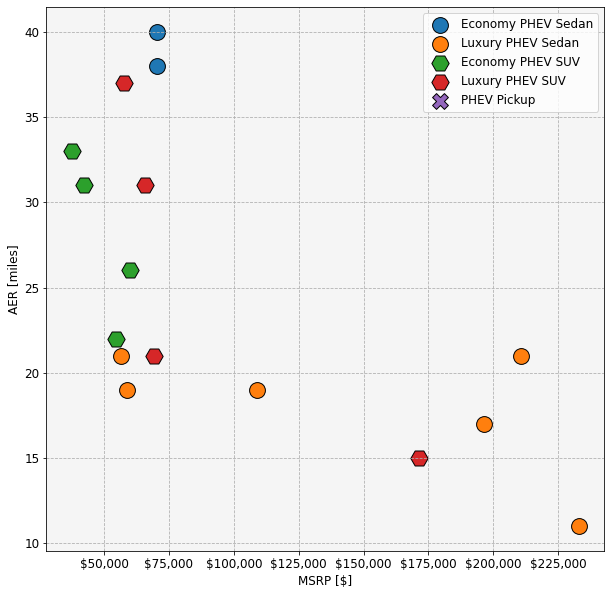

In [32]:
deep_reload(src)
import matplotlib.ticker as mtick

s=250
ec='k'
fontsize=12

plt.rc('font', size=fontsize)

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(info_phev_sedan_nlux['MSRP'],info_phev_sedan_nlux['AER'],s=s,marker='o',ec=ec,label='Economy PHEV Sedan')
ax.scatter(info_phev_sedan_lux['MSRP'],info_phev_sedan_lux['AER'],s=s,marker='o',ec=ec,label='Luxury PHEV Sedan')
ax.scatter(info_phev_suv_nlux['MSRP'],info_phev_suv_nlux['AER'],s=s*1.2,marker='H',ec=ec,label='Economy PHEV SUV')
ax.scatter(info_phev_suv_lux['MSRP'],info_phev_suv_lux['AER'],s=s*1.2,marker='H',ec=ec,label='Luxury PHEV SUV')
ax.scatter(info_phev_pickup['MSRP'],info_phev_pickup['AER'],s=s,marker='X',ec=ec,label='PHEV Pickup')

formatter=mtick.StrMethodFormatter('${x:,.0f}')
ax.set_xlabel('MSRP [$]')
ax.xaxis.set_major_formatter(formatter) 
ax.set_ylabel('AER [miles]')

ax.grid(ls='--')
ax.legend(loc=1)
ax.set_facecolor('whitesmoke')

fig.savefig('Document/figs/PriceRange_PHEVs.png',bbox_inches='tight',dpi=300)

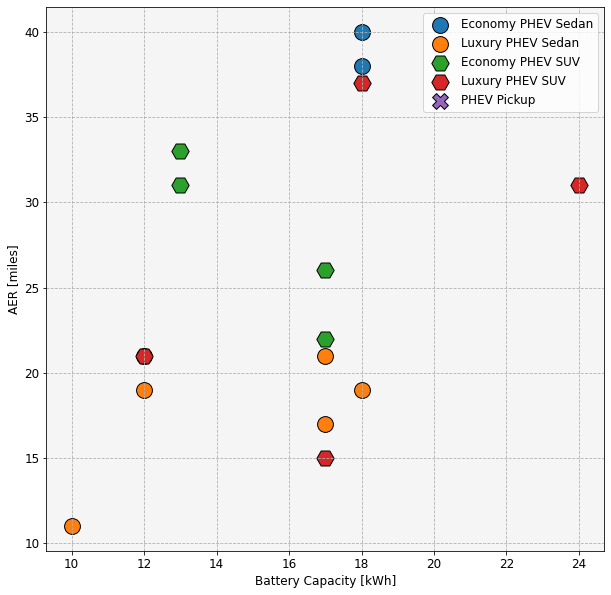

In [35]:
deep_reload(src)
import matplotlib.ticker as mtick

s=250
ec='k'
fontsize=12

plt.rc('font', size=fontsize)

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(info_phev_sedan_nlux['Battery Capacity (kWh)'],info_phev_sedan_nlux['AER'],s=s,marker='o',ec=ec,label='Economy PHEV Sedan')
ax.scatter(info_phev_sedan_lux['Battery Capacity (kWh)'],info_phev_sedan_lux['AER'],s=s,marker='o',ec=ec,label='Luxury PHEV Sedan')
ax.scatter(info_phev_suv_nlux['Battery Capacity (kWh)'],info_phev_suv_nlux['AER'],s=s*1.2,marker='H',ec=ec,label='Economy PHEV SUV')
ax.scatter(info_phev_suv_lux['Battery Capacity (kWh)'],info_phev_suv_lux['AER'],s=s*1.2,marker='H',ec=ec,label='Luxury PHEV SUV')
ax.scatter(info_phev_pickup['Battery Capacity (kWh)'],info_phev_pickup['AER'],s=s,marker='X',ec=ec,label='PHEV Pickup')

# formatter=mtick.StrMethodFormatter('${x:,.0f}')
ax.set_xlabel('Battery Capacity [kWh]')
# ax.xaxis.set_major_formatter(formatter) 
ax.set_ylabel('AER [miles]')

ax.grid(ls='--')
ax.legend(loc=1)
ax.set_facecolor('whitesmoke')

fig.savefig('Document/figs/CapacityRange_PHEVs.png',bbox_inches='tight',dpi=300)

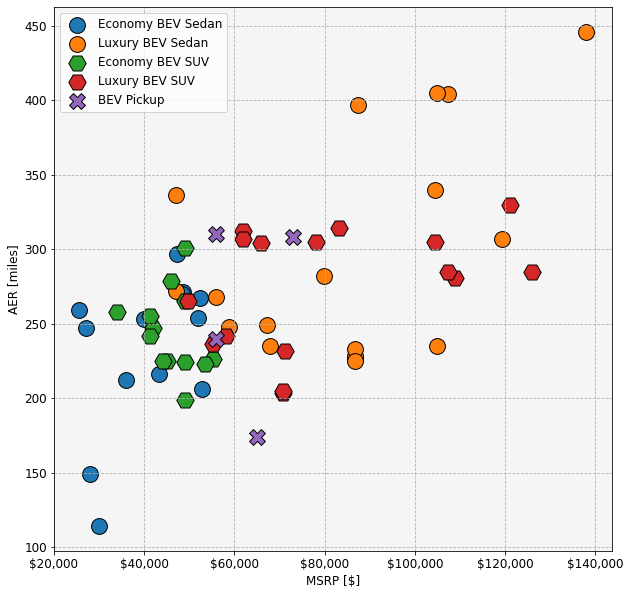

In [36]:
deep_reload(src)

s=250
ec='k'
fontsize=12

plt.rc('font', size=fontsize)

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(info_bev_sedan_nlux['MSRP'],info_bev_sedan_nlux['AER'],s=s,marker='o',ec=ec,label='Economy BEV Sedan')
ax.scatter(info_bev_sedan_lux['MSRP'],info_bev_sedan_lux['AER'],s=s,marker='o',ec=ec,label='Luxury BEV Sedan')
ax.scatter(info_bev_suv_nlux['MSRP'],info_bev_suv_nlux['AER'],s=s*1.2,marker='H',ec=ec,label='Economy BEV SUV')
ax.scatter(info_bev_suv_lux['MSRP'],info_bev_suv_lux['AER'],s=s*1.2,marker='H',ec=ec,label='Luxury BEV SUV')
ax.scatter(info_bev_pickup['MSRP'],info_bev_pickup['AER'],s=s,marker='X',ec=ec,label='BEV Pickup')

formatter=mtick.StrMethodFormatter('${x:,.0f}')
ax.set_xlabel('MSRP [$]')
ax.xaxis.set_major_formatter(formatter) 
ax.set_ylabel('AER [miles]')

ax.grid(ls='--')
ax.legend(loc=2)
ax.set_facecolor('whitesmoke')

fig.savefig('Document/figs/PriceRange_BEVs.png',bbox_inches='tight',dpi=300)

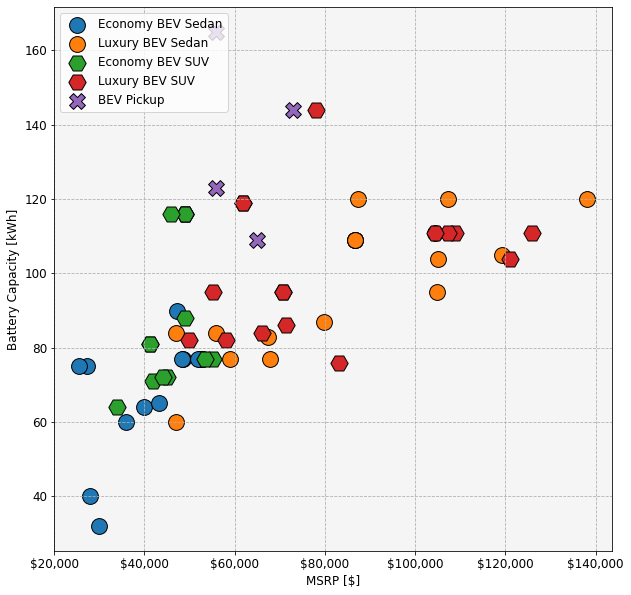

In [37]:
deep_reload(src)

s=250
ec='k'
fontsize=12

plt.rc('font', size=fontsize)

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(info_bev_sedan_nlux['MSRP'],info_bev_sedan_nlux['Battery Capacity (kWh)'],s=s,marker='o',ec=ec,label='Economy BEV Sedan')
ax.scatter(info_bev_sedan_lux['MSRP'],info_bev_sedan_lux['Battery Capacity (kWh)'],s=s,marker='o',ec=ec,label='Luxury BEV Sedan')
ax.scatter(info_bev_suv_nlux['MSRP'],info_bev_suv_nlux['Battery Capacity (kWh)'],s=s*1.2,marker='H',ec=ec,label='Economy BEV SUV')
ax.scatter(info_bev_suv_lux['MSRP'],info_bev_suv_lux['Battery Capacity (kWh)'],s=s*1.2,marker='H',ec=ec,label='Luxury BEV SUV')
ax.scatter(info_bev_pickup['MSRP'],info_bev_pickup['Battery Capacity (kWh)'],s=s,marker='X',ec=ec,label='BEV Pickup')

formatter=mtick.StrMethodFormatter('${x:,.0f}')
ax.set_xlabel('MSRP [$]')
ax.xaxis.set_major_formatter(formatter) 
ax.set_ylabel('Battery Capacity [kWh]')

ax.grid(ls='--')
ax.legend(loc=2)
ax.set_facecolor('whitesmoke')

fig.savefig('Document/figs/PriceCapacity_BEVs.png',bbox_inches='tight',dpi=300)

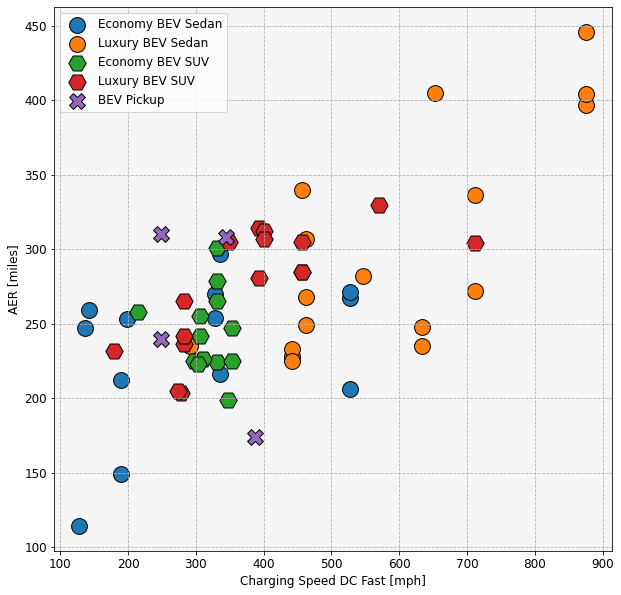

In [38]:
deep_reload(src)

s=250
ec='k'
fontsize=12

plt.rc('font', size=fontsize)

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(info_bev_sedan_nlux['Charging Speed DC Fast (miles per hour of charging)'],info_bev_sedan_nlux['AER'],s=s,marker='o',ec=ec,label='Economy BEV Sedan')
ax.scatter(info_bev_sedan_lux['Charging Speed DC Fast (miles per hour of charging)'],info_bev_sedan_lux['AER'],s=s,marker='o',ec=ec,label='Luxury BEV Sedan')
ax.scatter(info_bev_suv_nlux['Charging Speed DC Fast (miles per hour of charging)'],info_bev_suv_nlux['AER'],s=s*1.2,marker='H',ec=ec,label='Economy BEV SUV')
ax.scatter(info_bev_suv_lux['Charging Speed DC Fast (miles per hour of charging)'],info_bev_suv_lux['AER'],s=s*1.2,marker='H',ec=ec,label='Luxury BEV SUV')
ax.scatter(info_bev_pickup['Charging Speed DC Fast (miles per hour of charging)'],info_bev_pickup['AER'],s=s,marker='X',ec=ec,label='BEV Pickup')

# formatter=mtick.StrMethodFormatter('${x:,.0f}')
ax.set_xlabel('Charging Speed DC Fast [mph]')
# ax.xaxis.set_major_formatter(formatter) 
ax.set_ylabel('AER [miles]')

ax.grid(ls='--')
ax.legend(loc=2)
ax.set_facecolor('whitesmoke')

# fig.savefig('Document/figs/PriceRange_BEVs.png',bbox_inches='tight',dpi=300)

In [23]:
bevs=df_veh_info[(df_veh_info['Fuel']=='Electric')]
x=bevs['AER'].to_numpy()
y=bevs['Charging Speed DC Fast (miles per hour of charging)'].to_numpy()
p=np.polyfit(x, y, 1)
p

array([   2.00196528, -127.14592266])

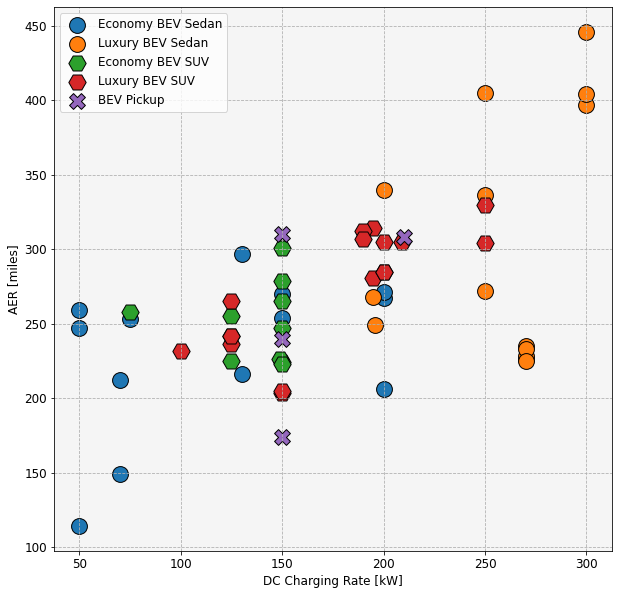

In [39]:
deep_reload(src)

s=250
ec='k'
fontsize=12

plt.rc('font', size=fontsize)

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(info_bev_sedan_nlux['Charging Rate DC Fast (kW)'],info_bev_sedan_nlux['AER'],s=s,marker='o',ec=ec,label='Economy BEV Sedan')
ax.scatter(info_bev_sedan_lux['Charging Rate DC Fast (kW)'],info_bev_sedan_lux['AER'],s=s,marker='o',ec=ec,label='Luxury BEV Sedan')
ax.scatter(info_bev_suv_nlux['Charging Rate DC Fast (kW)'],info_bev_suv_nlux['AER'],s=s*1.2,marker='H',ec=ec,label='Economy BEV SUV')
ax.scatter(info_bev_suv_lux['Charging Rate DC Fast (kW)'],info_bev_suv_lux['AER'],s=s*1.2,marker='H',ec=ec,label='Luxury BEV SUV')
ax.scatter(info_bev_pickup['Charging Rate DC Fast (kW)'],info_bev_pickup['AER'],s=s,marker='X',ec=ec,label='BEV Pickup')

# formatter=mtick.StrMethodFormatter('${x:,.0f}')
ax.set_xlabel('DC Charging Rate [kW]')
# ax.xaxis.set_major_formatter(formatter) 
ax.set_ylabel('AER [miles]')

ax.grid(ls='--')
ax.legend(loc=2)
ax.set_facecolor('whitesmoke')

# fig.savefig('Document/figs/PriceRange_BEVs.png',bbox_inches='tight',dpi=300)

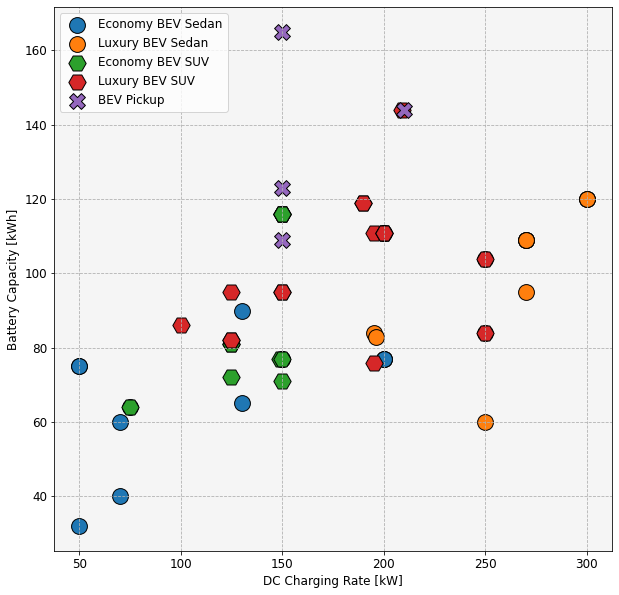

In [40]:
deep_reload(src)

s=250
ec='k'
fontsize=12

plt.rc('font', size=fontsize)

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(info_bev_sedan_nlux['Charging Rate DC Fast (kW)'],info_bev_sedan_nlux['Battery Capacity (kWh)'],s=s,marker='o',ec=ec,label='Economy BEV Sedan')
ax.scatter(info_bev_sedan_lux['Charging Rate DC Fast (kW)'],info_bev_sedan_lux['Battery Capacity (kWh)'],s=s,marker='o',ec=ec,label='Luxury BEV Sedan')
ax.scatter(info_bev_suv_nlux['Charging Rate DC Fast (kW)'],info_bev_suv_nlux['Battery Capacity (kWh)'],s=s*1.2,marker='H',ec=ec,label='Economy BEV SUV')
ax.scatter(info_bev_suv_lux['Charging Rate DC Fast (kW)'],info_bev_suv_lux['Battery Capacity (kWh)'],s=s*1.2,marker='H',ec=ec,label='Luxury BEV SUV')
ax.scatter(info_bev_pickup['Charging Rate DC Fast (kW)'],info_bev_pickup['Battery Capacity (kWh)'],s=s,marker='X',ec=ec,label='BEV Pickup')

# formatter=mtick.StrMethodFormatter('${x:,.0f}')
ax.set_xlabel('DC Charging Rate [kW]')
# ax.xaxis.set_major_formatter(formatter) 
ax.set_ylabel('Battery Capacity [kWh]')

ax.grid(ls='--')
ax.legend(loc=2)
ax.set_facecolor('whitesmoke')

# fig.savefig('Document/figs/PriceRange_BEVs.png',bbox_inches='tight',dpi=300)

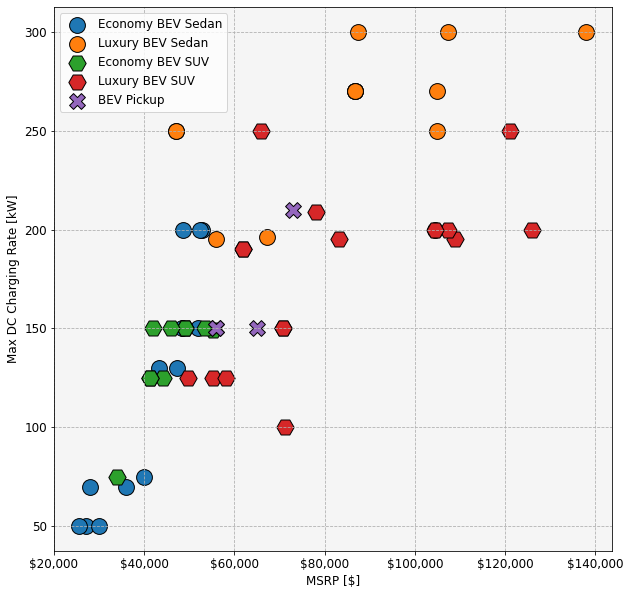

In [41]:
deep_reload(src)

s=250
ec='k'
fontsize=12

plt.rc('font', size=fontsize)

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(info_bev_sedan_nlux['MSRP'],info_bev_sedan_nlux['Charging Rate DC Fast (kW)'],s=s,marker='o',ec=ec,label='Economy BEV Sedan')
ax.scatter(info_bev_sedan_lux['MSRP'],info_bev_sedan_lux['Charging Rate DC Fast (kW)'],s=s,marker='o',ec=ec,label='Luxury BEV Sedan')
ax.scatter(info_bev_suv_nlux['MSRP'],info_bev_suv_nlux['Charging Rate DC Fast (kW)'],s=s*1.2,marker='H',ec=ec,label='Economy BEV SUV')
ax.scatter(info_bev_suv_lux['MSRP'],info_bev_suv_lux['Charging Rate DC Fast (kW)'],s=s*1.2,marker='H',ec=ec,label='Luxury BEV SUV')
ax.scatter(info_bev_pickup['MSRP'],info_bev_pickup['Charging Rate DC Fast (kW)'],s=s,marker='X',ec=ec,label='BEV Pickup')

formatter=mtick.StrMethodFormatter('${x:,.0f}')
ax.set_xlabel('MSRP [$]')
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Max DC Charging Rate [kW]')

ax.grid(ls='--')
ax.legend(loc=2)
ax.set_facecolor('whitesmoke')

# fig.savefig('Document/figs/PriceRange_BEVs.png',bbox_inches='tight',dpi=300)

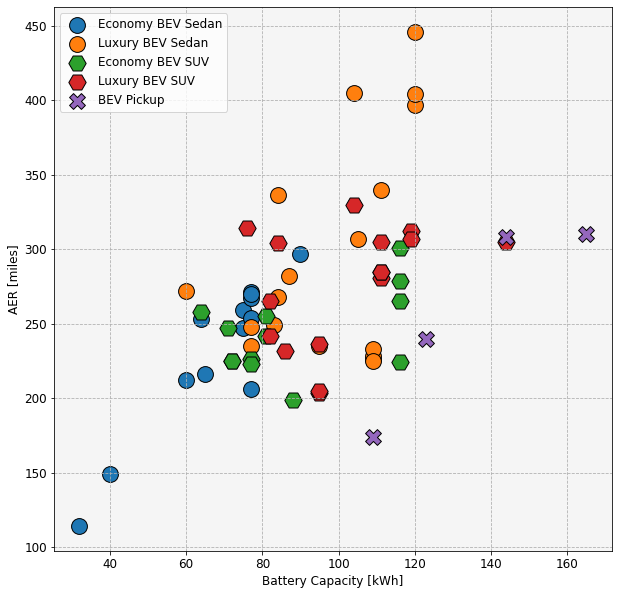

In [42]:
deep_reload(src)

s=250
ec='k'
fontsize=12

plt.rc('font', size=fontsize)

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(info_bev_sedan_nlux['Battery Capacity (kWh)'],info_bev_sedan_nlux['AER'],s=s,marker='o',ec=ec,label='Economy BEV Sedan')
ax.scatter(info_bev_sedan_lux['Battery Capacity (kWh)'],info_bev_sedan_lux['AER'],s=s,marker='o',ec=ec,label='Luxury BEV Sedan')
ax.scatter(info_bev_suv_nlux['Battery Capacity (kWh)'],info_bev_suv_nlux['AER'],s=s*1.2,marker='H',ec=ec,label='Economy BEV SUV')
ax.scatter(info_bev_suv_lux['Battery Capacity (kWh)'],info_bev_suv_lux['AER'],s=s*1.2,marker='H',ec=ec,label='Luxury BEV SUV')
ax.scatter(info_bev_pickup['Battery Capacity (kWh)'],info_bev_pickup['AER'],s=s,marker='X',ec=ec,label='BEV Pickup')

# formatter=mtick.StrMethodFormatter('${x:,.0f}')
ax.set_xlabel('Battery Capacity [kWh]')
# ax.xaxis.set_major_formatter(formatter) 
ax.set_ylabel('AER [miles]')

ax.grid(ls='--')
ax.legend(loc=2)
ax.set_facecolor('whitesmoke')

# fig.savefig('Document/figs/PriceRange_BEVs.png',bbox_inches='tight',dpi=300)

In [57]:
df_veh_info_all=pd.read_excel('vehicles-2023-06-22.xlsx')
info_phev=df_veh_info_all[(df_veh_info_all['Fuel']=='Plug-in Hybrid Electric')]
info_bev=df_veh_info_all[(df_veh_info_all['Fuel']=='Electric')]
info_hev=df_veh_info_all[(df_veh_info_all['Fuel']=='Hybrid Electric')]

(array([ 4.,  2.,  4.,  7., 11.,  7.,  2.,  4.,  4.,  2.,  6.,  0.,  0.,
         0.,  7.,  0.,  2.,  1.,  0.,  1.]),
 array([ 25600.,  31220.,  36840.,  42460.,  48080.,  53700.,  59320.,
         64940.,  70560.,  76180.,  81800.,  87420.,  93040.,  98660.,
        104280., 109900., 115520., 121140., 126760., 132380., 138000.]),
 <BarContainer object of 20 artists>)

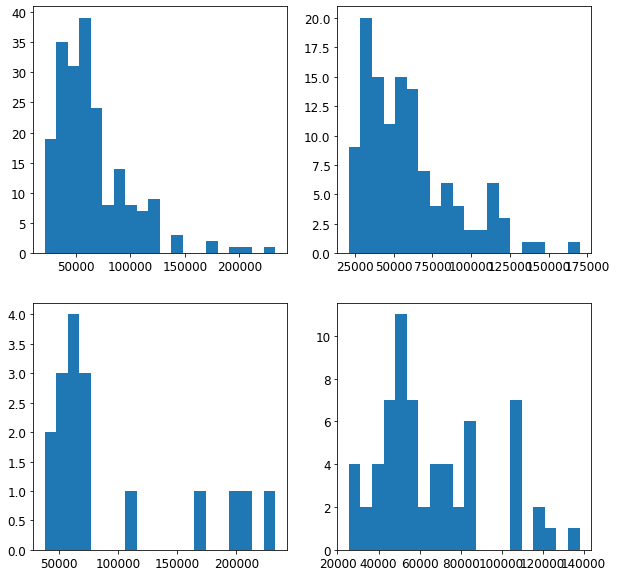

In [61]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
ax[0,0].hist(df_veh_info_all['MSRP'],bins=20)
ax[0,1].hist(info_hev['MSRP'],bins=20)
ax[1,0].hist(info_phev['MSRP'],bins=20)
ax[1,1].hist(info_bev['MSRP'],bins=20)